# REDDIT TICKER TRACKER

## Imports and stuff

### Reddit api

In [1]:
CLIENT_ID = 'qiGxoKr0w3soWifFQpodcg'
SECRET_KEY = 'L0GVArYiav7pDd7HDcyhBrSvr2-6BA'
USERNAME = 'Ok_Cycle_9995'
PASSWORD = 'TICKERtest123!'

In [2]:
import praw
import matplotlib.pyplot as plt

In [3]:
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=SECRET_KEY,
    password=PASSWORD,
    user_agent="testing",
    username=USERNAME,
)

### Stock ticker info

In [4]:
import pandas as pd
import os
cwd = os.getcwd()
parent_dir = os.path.abspath(os.path.join(cwd, os.pardir))
file_path = os.path.join(parent_dir,'data', 'nasdaq_screener_1711467065464.csv')
df = pd.read_csv(file_path)

In [5]:
symbol_list = [str(symbol).upper() if not pd.isna(symbol) else '' for symbol in df['Symbol'].tolist()]
name_list = [name.lower() for name in df['Name'].tolist()]

## REDDIT FUNCTIONS

### Posts, body and comments function

In [13]:
def get_tickers(sub_list, num_posts, num_comments):
    word_dict ={}
    for sub in sub_list:
        subreddit = reddit.subreddit(sub)
        submissions = subreddit.hot(limit = num_posts)
        
        data = []
        for submission in submissions:
            data.extend(submission.title.split())
            data.extend(submission.selftext.split())
            
            if num_comments >0:
                comment_number = num_comments - 0
                submission.comments.replace_more(limit=comment_number)
                for comment in submission.comments.list():
                    if isinstance(comment, praw.models.MoreComments):
                        continue
                    data.extend(comment.body.split())
        
        for word in data:
            if word.isupper() and word in symbol_list and len(word)>1:
                    if word in word_dict:
                        word_dict[word] += 1
                    else:
                        word_dict[word] = 1
    
    sorted_data = dict(sorted(word_dict.items(), key = lambda item:item[1]))
    return sorted_data

In [16]:
test_list = ['stocks','wallstreetbets']
test = get_tickers(test_list, 3, 1)
print(test)

Rate My Portfolio - r/Stocks Quarterly Thread March 2024
r/Stocks Daily Discussion Wednesday - Apr 03, 2024
Trump sues co-founders over shares
Daily Discussion Thread for April 3, 2024
Most Anticipated Earnings Releases for the week beginning April 1st, 2024
Amazon quits self-checkout technology
{'UNH': 1, 'MPW': 1, 'OXY': 1, 'ACMR': 1, 'FICO': 1, 'INTU': 1, 'MA': 1, 'MCO': 1, 'SPGI': 1, 'ANET': 1, 'NEO': 1, 'BN': 1, 'NU': 1, 'ISRG': 1, 'AXP': 1, 'ASML': 1, 'WM': 1, 'RR': 1, 'KO': 1, 'MU': 1, 'PR': 1, 'ROKU': 1, 'BYND': 1, 'UDMY': 1, 'VFF': 1, 'TWOU': 1, 'COUR': 1, 'BAC': 1, 'LOW': 1, 'XP': 1, 'FIVE': 1, 'HD': 1, 'GE': 1, 'VITL': 1, 'ALG': 1, 'IESC': 1, 'LLAP': 1, 'GTLB': 1, 'CMG': 1, 'UBER': 1, 'CAVA': 1, 'ARM': 1, 'HOOD': 1, 'LLY': 1, 'MARA': 1, 'MTLS': 1, 'MVST': 1, 'BA': 1, 'BRK/B': 1, 'CHWY': 1, 'DOCN': 1, 'LRCX': 1, 'LYV': 1, 'MNST': 1, 'NICE': 1, 'RBLX': 1, 'SHOP': 1, 'TLRY': 1, 'MSCI': 1, 'EM': 1, 'ADM': 1, 'QS': 1, 'TSN': 1, 'BOOM': 1, 'JD': 1, 'VFC': 1, 'FVRR': 1, 'PARA': 1, 

### Post and body function

In [16]:
def get_tickers_no_comm(sub_list):
    word_dict ={}
    for sub in sub_list:
        subreddit = reddit.subreddit(sub)
        submissions = subreddit.hot(limit = 50)
        
        data = []
        for submission in submissions:
            data.extend(submission.title.split())
            data.extend(submission.selftext.split())
        
        #only add words that are all in upper case
        for word in data:
            if word.isupper() and word in symbol_list and len(word)>1:
                    if word in word_dict:
                        word_dict[word] += 1
                    else:
                        word_dict[word] = 1
        
        #adds all words that could be tickers
        #for word in data:
            #if word.upper() in symbol_list and len(word)>1:
                    #if word.upper() in word_dict:
                        #word_dict[word.upper()] += 1
                    #else:
                        #word_dict[word.upper()] = 1
                        
    return word_dict

In [17]:
subreddits=['stocks','wallstreetbets','investing','options']

new = get_tickers_no_comm(subreddits)
sorted_data = dict(sorted(new.items(), key = lambda item:item[1]))

print(sorted_data)

{'ANY': 1, 'GOOD': 1, 'OR': 1, 'CAN': 1, 'ME': 1, 'WING': 1, 'CMG': 1, 'GENK': 1, 'GME': 1, 'PATH': 1, 'PEG': 1, 'HD': 1, 'LULU': 1, 'AAPL': 1, 'LMT': 1, 'NKLA': 1, 'FUN': 1, 'PAY': 1, 'UK': 1, 'NCNO': 1, 'ES': 1, 'AMD': 1, 'META': 1, 'MSM': 1, 'DAY': 1, 'HAS': 1, 'PLAY': 1, 'ARE': 1, 'ALL': 1, 'AMZN': 1, 'INTC': 1, 'CMC': 1, 'USA': 1, 'MMM': 1, 'DTE': 1, 'RUN': 1, 'RSI': 1, 'CBOE': 1, 'ML': 1, 'BWB': 1, 'IE': 1, 'MARA': 1, 'FDX': 1, 'EA': 2, 'IMO': 2, 'CAVA': 2, 'COO': 2, 'EXP': 2, 'TD': 2, 'CME': 2, 'VC': 2, 'EU': 2, 'EDIT': 2, 'RDDT': 3, 'SOFI': 3, 'PM': 3, 'GES': 3, 'BYD': 3, 'FA': 3, 'VS': 3, 'MSFT': 4, 'NVDA': 4, 'DD': 4, 'TSM': 4, 'UBS': 5, 'NIO': 5, 'DJT': 5, 'IBKR': 5, 'LLY': 6, 'CC': 6, 'RH': 7, 'FCF': 8, 'TSLA': 9, 'AM': 14, 'TKO': 26, 'AI': 39}


<function matplotlib.pyplot.show(close=None, block=None)>

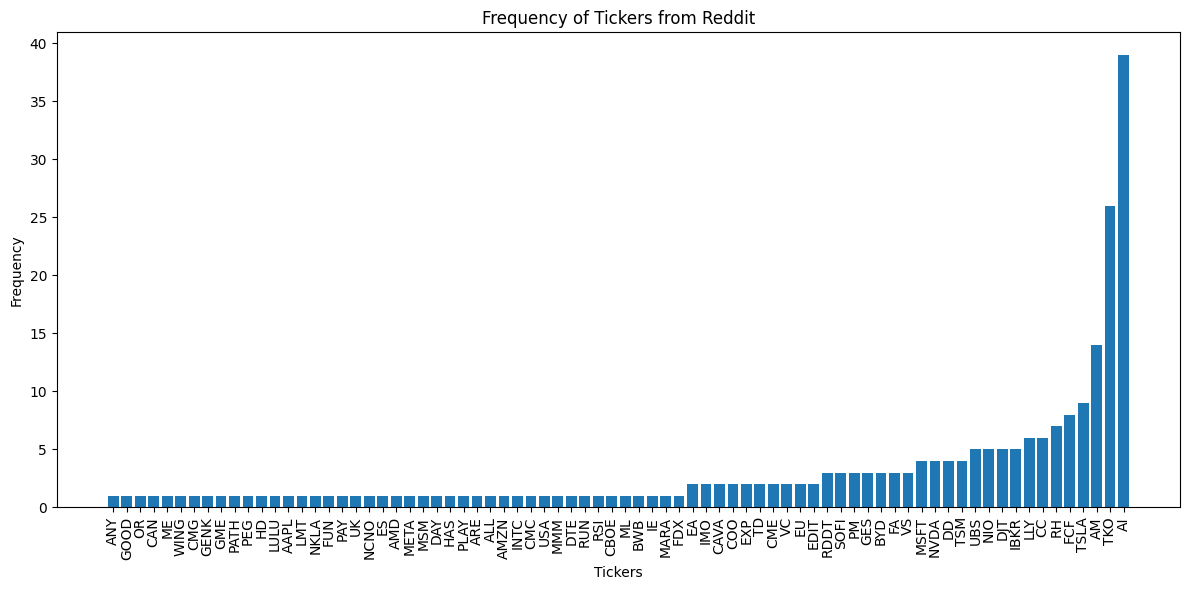

In [18]:
ticker = (sorted_data.keys())
count = (sorted_data.values())
plt.figure(figsize =(12,6))
plt.bar(ticker, count)
plt.xlabel('Tickers')
plt.ylabel('Frequency')
plt.title('Frequency of Tickers from Reddit')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show

### Comments from daily discussion

In [37]:
def daily_comms():
    com_dict = {}
    data =[]
    subreddit = reddit.subreddit('wallstreetbets')
    submission = next(subreddit.hot(limit = 1))
    submission.comments.replace_more(limit=0)
    
    for comment in submission.comments.list():
        if isinstance(comment, praw.models.MoreComments):
            continue
        data.extend(comment.body.split())
    
    for word in data:
            if word.upper() in symbol_list and len(word)>1:
                    if word.upper() in com_dict:
                        com_dict[word.upper()] += 1
                    else:
                        com_dict[word.upper()] = 1
                        
    return dict(sorted(com_dict.items(), key = lambda item:item[1])) 

In [38]:
yo = daily_comms()
print(yo)

{'BEST': 1, 'PRE': 1, 'EU': 1, 'TOP': 1, 'CASH': 1, 'NVDA': 1, 'BUD': 1, 'ME': 1, 'DAL': 1, 'CCL': 1, 'TWO': 1, 'BIT': 1, 'GOLD': 1, 'PLAY': 1, 'COST': 1, 'LAAC': 1, 'TELL': 1, 'POST': 1, 'OP': 1, 'ANY': 1, 'PLUS': 1, 'WELL': 1, 'BIG': 1, 'CAN': 1, 'RELY': 1, 'SAVE': 1, 'BACK': 1, 'CAR': 1, 'MOVE': 1, 'TRIP': 1, 'AIR': 1, 'HE': 1, 'AGO': 2, 'BKNG': 2, 'PAY': 2, 'ABNB': 2, 'LOVE': 2, 'NEXT': 2, 'RUN': 2, 'SEE': 2, 'LOT': 2, 'LIFE': 2, 'SAY': 2, 'FUN': 2, 'GOOD': 2, 'NOW': 3, 'AN': 3, 'HAS': 4, 'AS': 4, 'SO': 4, 'UP': 5, 'BY': 5, 'OUT': 5, 'DO': 6, 'BE': 6, 'OR': 6, 'GO': 6, 'AI': 7, 'ALL': 10, 'IT': 11, 'ON': 16, 'FOR': 19, 'YOU': 23, 'ARE': 25}


### Comments and sentiment analysis

In [6]:
from transformers import pipeline

2024-04-04 15:52:02.766178: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
classifier = pipeline('sentiment-analysis', model = 'mwkby/distilbert-base-uncased-sentiment-reddit-crypto')

In [7]:
class_2 = pipeline('sentiment-analysis', model = 'cardiffnlp/twitter-roberta-base-sentiment-latest')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
def daily_comms_sent():
    com_dict = {'Stock':[],'Frequency':[],'Positive':[],'Neutral':[],'Negative':[],'Score':[]}
    subreddit = reddit.subreddit('wallstreetbets')
    submissions = subreddit.hot(limit = 3)
    submission = None
    for sub in submissions:
        if 'Daily Discussion' in sub.title:
            print(sub.title)
            submission = sub
            break
    if submission:
        submission.comments.replace_more(limit=0)
    
        for comment in submission.comments.list():
            if isinstance(comment, praw.models.MoreComments):
                continue
            body = comment.body 
            ticker_count = 0
        
            for word in body.split():
                if word.isupper() and word in symbol_list and len(word)>1:
                    ticker_count +=1
                    word_upper = word.upper()
                
                #above for only words in all caps, bellow for all words that match ticker
                #if word.upper() in symbol_list and len(word)>1 and word.upper() not in not_stocks:
                    if word_upper not in com_dict['Stock']:
                        com_dict['Stock'].append(word_upper)
                        com_dict['Frequency'].append(0)
                        com_dict['Score'].append(0)
                        com_dict['Positive'].append(0)
                        com_dict['Neutral'].append(0)
                        com_dict['Negative'].append(0)
                    
                    index = com_dict['Stock'].index(word_upper)
                    com_dict['Frequency'][index] += 1
                    
                    #do sentiment analysis for comment 
            if ticker_count == 1:        
                pred = class_2(body)
                score = pred[0]['score']
                com_dict['Score'][index] += score
                Label = pred[0]['label']
                com_dict[Label.capitalize()][index] += 1
    else:
        return com_dict
    ticker_df = pd.DataFrame(com_dict)
    
    sorted_ticker_df = ticker_df.sort_values(by='Frequency', ascending = False)
    
   
    return sorted_ticker_df

In [18]:
test = 'Inshallah it goes to 0 this week and my puts max out'
pred = class_2(test)
print(pred)

[{'label': 'neutral', 'score': 0.6059423089027405}]


In [12]:
print(pred[0]['score'])

0.9746753573417664


In [10]:
test_2 = daily_comms_sent()
print(test_2)

Daily Discussion Thread for April 4, 2024
    Stock  Frequency  Positive  Neutral  Negative      Score
0    NVDA         31         6        9         7  16.195334
1     TSM         29         4       13         4  15.750948
2     DJT         13         1        6         5   8.560260
3    AAPL         10         1        3         1   3.749139
6     AMD          9         0        6         1   5.380722
26    YOU          5         0        0         0   0.000000
11    PAA          4         0        3         1   2.516672
27   RDDT          4         0        1         2   2.711091
24   TSLA          4         0        2         1   1.938532
31   PLTR          3         0        3         0   2.022385
21     UP          3         1        0         0   0.612527
17    CAN          3         0        0         0   0.000000
4    OPEN          3         0        1         1   1.380582
18  GOOGL          2         0        0         1   0.748379
29     GO          2         0        0    

In [9]:
test = daily_comms_sent()
print(test)

Daily Discussion Thread for April 3, 2024
   Stock  Frequency  Positive  Neutral  Negative      Score
0   TSLA         18        12        0         6  16.956894
16  NVDA          8         5        0         3   7.628449
9    TSM          8         2        0         6   7.437287
14  AAPL          7         4        0         3   6.514985
19    AI          7         3        0         4   6.857818
23   AZZ          5         4        0         1   4.470415
18   ADP          5         4        0         1   4.678483
17   DJT          5         3        0         2   4.480331
3     DD          4         1        0         3   3.979995
20   PAA          3         1        0         2   2.597010
15  RDDT          3         1        0         2   2.343045
11   AMD          2         0        0         2   1.993432
41  INTC          2         1        0         1   1.977457
31   EOD          2         2        0         0   1.972687
37   XOM          2         1        0         1   1.78782

In [12]:
not_stocks = ['IT','FOR','ON','YOU','SO','BE','UP','GOOD','ARE','DAY','OR','ALL','CAN','ME','DO','BY','GO','OUT',
              'AS','BACK','OPEN','SEE','PUMP','NOW','BIG','HAS','NEXT','EOD','AN','AM','CASH','PLAY','HEAR','SAY',
              'LOW','TOP','LOVE','ANY','HE','TWO','RH','CCL','HOPE','SNOW','GLAD','EVER','AI','LIVE','BILL','NET',
              'IMO','BRO','POST','PR','HUGE','PEP','NICE','CARE','DD','LIFE','GAME']

## Build Datasets

In [40]:
def dataset_builder(sub):
    Comments=[]
    subreddit = reddit.subreddit(sub)
    submissions = subreddit.hot(limit = 3)
    submission = None
    for sub in submissions:
        if 'Daily Discussion' in sub.title:
            submission = sub
            break
            
    if submission:
        submission.comments.replace_more(limit=0)
    
        for comment in submission.comments.list():
            if isinstance(comment, praw.models.MoreComments):
                continue
            body = comment.body 
            for word in body.split():
                if word.isupper() and word in symbol_list and len(word)>1:
                    Comments.append(body)
    
    return Comments

In [41]:
data_test=dataset_builder('wallstreetbets')
print(data_test)

["Fund managers and MMs trade just as emotionally as retail. \n\nYou can't tell me Cathie doesn't absolutely RAGE BUY shit like PLTR when she makes a bad call before explaining it away with cobbled together DD about innovation and story.", "Fund managers and MMs trade just as emotionally as retail. \n\nYou can't tell me Cathie doesn't absolutely RAGE BUY shit like PLTR when she makes a bad call before explaining it away with cobbled together DD about innovation and story.", "> US SECRETARY OF STATE ANTONY BLINKEN’S AIRCRAFT HAD MECHANICAL ISSUE IN PARIS, US DELEGATION DROVE TO BRUSSELS FOR NATO MEETING - - STATE DEPARTMENT SPOKESPERSON And no, it's not an Airbus", 'Just OPEN THE FUCKING CASINO and get this bitch over with', 'THE FED HAS LOST CONTROL', 'JPOW GONNA FART ON HIS HAND AND SLAP THE BEARS TODAY', 'TSM green as AI is being used to track aftershocks and tidal waves\n\nGet rekt 🐻 ![img](emote|t5_2th52|4267)![img](emote|t5_2th52|4271)', 'TSM green as AI is being used to track aft

In [42]:
print(len(data_test))

124


In [47]:
import re

In [45]:
def clean_data(data):
    cleaned_data = []
    for comment in data:
        cleaned_comment = re.sub(r'[^a-zA-Z0-9\s]', '', comment)
        cleaned_data.append(cleaned_comment)
    return cleaned_data

In [48]:
clean_data(data_test)

['Fund managers and MMs trade just as emotionally as retail \n\nYou cant tell me Cathie doesnt absolutely RAGE BUY shit like PLTR when she makes a bad call before explaining it away with cobbled together DD about innovation and story',
 'Fund managers and MMs trade just as emotionally as retail \n\nYou cant tell me Cathie doesnt absolutely RAGE BUY shit like PLTR when she makes a bad call before explaining it away with cobbled together DD about innovation and story',
 ' US SECRETARY OF STATE ANTONY BLINKENS AIRCRAFT HAD MECHANICAL ISSUE IN PARIS US DELEGATION DROVE TO BRUSSELS FOR NATO MEETING   STATE DEPARTMENT SPOKESPERSON And no its not an Airbus',
 'Just OPEN THE FUCKING CASINO and get this bitch over with',
 'THE FED HAS LOST CONTROL',
 'JPOW GONNA FART ON HIS HAND AND SLAP THE BEARS TODAY',
 'TSM green as AI is being used to track aftershocks and tidal waves\n\nGet rekt  imgemotet52th524267imgemotet52th524271',
 'TSM green as AI is being used to track aftershocks and tidal waves\